Import Library

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dumb/data/fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


Validasi Jumlah Data

In [ ]:
print("Jumlah data:", len(df))

Jumlah data: 6335


Cek Distribusi Label

In [ ]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

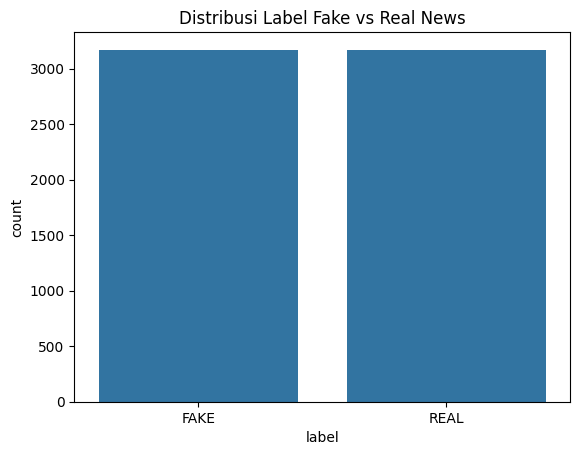

In [ ]:
sns.countplot(data=df, x='label')
plt.title("Distribusi Label Fake vs Real News")
plt.show()

Text Cleaning (Untuk Model LSTM)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

Encoding Label

In [ ]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'FAKE': 0, 'REAL': 1}


Train / Validation / Test Split

In [ ]:
X = df['clean_text']
y = df['label_encoded']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", len(X_train))
print("Validation:", len(X_val))
print("Test:", len(X_test))

Train: 4434
Validation: 950
Test: 951


Simpan Data

In [ ]:
X_train.to_csv("/content/drive/MyDrive/dumb/data/X_train.csv", index=False)
X_val.to_csv("/content/drive/MyDrive/dumb/data/X_val.csv", index=False)
X_test.to_csv("/content/drive/MyDrive/dumb/data/X_test.csv", index=False)

y_train.to_csv("/content/drive/MyDrive/dumb/data/y_train.csv", index=False)
y_val.to_csv("/content/drive/MyDrive/dumb/data/y_val.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/dumb/data/y_test.csv", index=False)
